<div style="text-align: right;">
    <h3>Nainil Maladkar (002780019)</h3>
    <h3>Project 2: Supervised Learning with Feature Engineering</h3>
    <h3>INFO7390 - Advances in Data Science and Architecture</h3>
</div>


### References

1. Supervised Learning python notebooks by Prof. Junwei Huang
2. XGBoost CV Importance : [kaggle article link](https://www.kaggle.com/code/prashant111/xgboost-k-fold-cv-feature-importance/notebook)
3. Test and validation : [Kaggle discussion on parameter selection](https://www.kaggle.com/code/kailex/xgb-text2vec-tfidf-0-2237/script)
4. Kaggle data set : [Guide to work on dataset in python](https://www.kaggle.com/c/avito-demand-prediction)
5. Microsoft Bing Chat 


# Advertisement Success Prediction

### Project Description

The **Advertisement Success Prediction** is a Python supervised learning project that aims to retrieve the top listed factors that affect the succes of Advertisements put up on Social Media 
The training and testing data set is obtained from `Kaggle` - **Russian Company : Avito** `'(https://www.kaggle.com/c/avito-demand-prediction)` [Kaggle Dataset](https://www.kaggle.com/c/avito-demand-prediction)

This project utilizes  libraries `Pandas`, `Numpy`, `Matplotlib`, `Seaborn`, `Sklearn`

### Features:

This notebook explores Supervised Regression Machine Learning methods such as 
1. **Linear regression**  
2. **Decision tree** , and ensemble models such as 
3. **RandomForest**
4. **XGBoost** using Scikit Learn

The notebook is broken down into following sections: 

* Import libraries and access data
* EDA and Feature Engineering
* Data preparation and feature selection
* Evaluating based on RSME
* Select Model without Hyperparameter tuning
* Hyper parameter using selected model
* Make prediction 
* Result Summary

In [1]:
import numpy as np 
import pandas as pd 
import os

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random

# Viz
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go


## Get `TRAIN` and `TEST` dataset

In [ ]:
#Get Dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
#sample_submission_df = pd.read_csv('sample_submission.csv')

In [3]:
train_df.info()

In [4]:
train_df.head()

The train data is 1,503,424 rows. `deal_probability` is the target variable.

In [5]:
#get Activation date datatype for analysis 
train_df.activation_date.dtype

## EDA and Feature Engineering

 * There are missing data and duplicates
 * Fetching the month, day of month, year, day of week and is a weekend fields from the activation date.

In [6]:
train_df['activation_date'] = pd.to_datetime(train_df['activation_date'])

train_df['month'] = train_df.activation_date.dt.month
train_df['dayofmonth'] = train_df.activation_date.dt.day
train_df['year'] = train_df.activation_date.dt.year
train_df['dayofweek'] = train_df.activation_date.dt.weekday
train_df['isweekend'] = (train_df.activation_date.dt.weekday > 4).astype(int)

In [7]:
train_df['month'] = train_df.activation_date.dt.month
train_df['dayofmonth'] = train_df.activation_date.dt.day
train_df['year'] = train_df.activation_date.dt.year
train_df['dayofweek'] = train_df.activation_date.dt.weekday
train_df['isweekend'] = (train_df.activation_date.dt.weekday > 4).astype(int)

In [8]:
# Twt_OG_columns_df = train_df.columns
# print(Twt_OG_columns_df.tolist())

### Correlation Matrix between relevant columns

In [9]:
cols = ['price', 'image_top_1', 'deal_probability', 'month', 'dayofmonth', 'dayofweek', 'isweekend']
train_df_corr = train_df[cols]

# Calculate the correlation matrix
corr_matrix = train_df_corr.corr()
print(corr_matrix)
# # Create a heatmap
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

                     price  image_top_1  deal_probability     month  \
price             1.000000     0.034404         -0.001097 -0.000009   
image_top_1       0.034404     1.000000          0.189979  0.001504   
deal_probability -0.001097     0.189979          1.000000  0.003555   
month            -0.000009     0.001504          0.003555  1.000000   
dayofmonth        0.000081     0.005849         -0.002379 -0.011558   
dayofweek        -0.001174    -0.024776          0.002096  0.001407   
isweekend        -0.001430    -0.029956          0.000588  0.002099   

                  dayofmonth  dayofweek  isweekend  
price               0.000081  -0.001174  -0.001430  
image_top_1         0.005849  -0.024776  -0.029956  
deal_probability   -0.002379   0.002096   0.000588  
month              -0.011558   0.001407   0.002099  
dayofmonth          1.000000  -0.130194   0.072860  
dayofweek          -0.130194   1.000000   0.799321  
isweekend           0.072860   0.799321   1.000000  


## Exploratory Data Analysis 

* `price` has a right skewness

* `image_top1` has the highest value around 2400 <br>

* `deal_probability` has the highest value around 0.1

* `month` value of `3 (March)` is only available in the train dataset

* `dayofmonth` in the dataset ranges from 15th to 30th

* `year` value of 2017 is only available in the train dataset

* `dayofweek` has acceptable values

* `isweekend` also has acceptable 0, 1 values

* `year`, `param_1`, `param_2` doesn’t have significant correaltion with the dataset

In [10]:
# from matplotlib import pyplot

# train_df.hist(rwidth=0.5, figsize=(15,10))
# pyplot.show();

In [11]:
# sns.histplot(data=train_df, x='dayofmonth');

In [12]:
# sns.barplot(data=train_df, x='dayofweek', y='deal_probability');

In [13]:
# fig = px.pie(train_df, 
#              names="user_type", 
#              color_discrete_sequence=px.colors.sequential.Agsunset_r, 
#              title='User type distribution')
# fig.show();

In [14]:
#test_df = pd.read_csv('test.csv')

In [15]:
#test_df.head()

In [16]:
# Removing user_id column 
input_cols = ['region', 
              'city', 
              'parent_category_name', 
              'category_name',  
              'param_1',
              # 'param_2',
              # 'param_3',
              'title', 
              'price',
              'user_type',
              'image_top_1',
              'month',
              'dayofmonth', 
              'year',
              'dayofweek',
              'isweekend'
              ]
target_col = 'deal_probability'

In [17]:
inputs_df, targets = train_df[input_cols].copy(), train_df[target_col].copy()

In [18]:
#inputs_df.head()

In [19]:
#train_df.head()

 #### Fetching the month, day of month, year, day of week and is a weekend fields from the `activation date` for `test_df`

In [20]:
# Identify numeric and categorical columns

numeric_cols = ['price', 'image_top_1']
categorical_cols = ['region', 'city', 'parent_category_name', 'category_name', 'param_1', 'title', 
                    'user_type', 'month', 'dayofmonth', 'dayofweek', 'isweekend']

In [21]:
test_df['activation_date'] = pd.to_datetime(train_df['activation_date'])

test_df['month'] = train_df.activation_date.dt.month
test_df['dayofmonth'] = train_df.activation_date.dt.day
test_df['year'] = train_df.activation_date.dt.year
test_df['dayofweek'] = train_df.activation_date.dt.weekday
test_df['isweekend'] = (train_df.activation_date.dt.weekday > 4).astype(int)

In [22]:
test_df['month'] = train_df.activation_date.dt.month
test_df['dayofmonth'] = train_df.activation_date.dt.day
test_df['year'] = train_df.activation_date.dt.year
test_df['dayofweek'] = train_df.activation_date.dt.weekday
test_df['isweekend'] = (train_df.activation_date.dt.weekday > 4).astype(int)

In [23]:
Twt_OG_columns_df = test_df.columns
print(Twt_OG_columns_df.tolist())

['item_id', 'user_id', 'region', 'city', 'parent_category_name', 'category_name', 'param_1', 'param_2', 'param_3', 'title', 'description', 'price', 'item_seq_number', 'activation_date', 'user_type', 'image', 'image_top_1', 'month', 'dayofmonth', 'year', 'dayofweek', 'isweekend']


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import sklearn

from matplotlib import pyplot

## Imputing missing values

* Imputing the null values in the numeric features `price` ,`image_top_1` a column with -9999 categorical features with the value of Missing both input and test datasets.

* Since the input dataset does not have the description and user_id columns, dropping from the test dataset.

## Scale Data With Normalization
The default scale for the MinMaxScaler is to rescale variables into the range [0,1].

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

## Transform Categories With Encoding
Encode labels with value between 0 and n_classes-1. Encode the train and test datasets.

In [26]:
# Encode labels of multiple Categorical columns at once
from sklearn.preprocessing import LabelEncoder

inputs_df[categorical_cols] = inputs_df[categorical_cols].apply(LabelEncoder().fit_transform)
inputs_df.head()

,region,city,parent_category_name,category_name,param_1,title,price,user_type,image_top_1,month,dayofmonth,year,dayofweek,isweekend
0,19,460,4,42,248,298998,5.031383e-09,1,0.328767,0,17,2017,1,0
1,17,1300,2,22,121,676606,3.773537e-08,1,0.225701,0,15,2017,6,1
2,16,1276,0,2,83,79843,5.031383e-08,1,0.988911,0,9,2017,0,0
3,21,940,4,42,37,109705,2.767260e-08,0,0.259622,0,14,2017,5,1
4,4,317,6,0,277,161476,5.031383e-07,1,0.738421,0,5,2017,3,0


## Splitting the training, validation inputs and targets
Split the input data into a train and validation set

In [27]:
# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df, targets, test_size=0.25, random_state=42)
print("Size of training set:", len(train_inputs))
print("Size of validation set:", len(val_inputs))

Size of training set: 1127568
Size of validation set: 375856


In [28]:
X_train = train_inputs[numeric_cols + categorical_cols]

In [29]:
X_val = val_inputs[numeric_cols + categorical_cols]

In [30]:
#revisit error
X_test = test_df[numeric_cols + categorical_cols]

In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508438 entries, 0 to 508437
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   item_id               508438 non-null  object        
 1   user_id               508438 non-null  object        
 2   region                508438 non-null  object        
 3   city                  508438 non-null  object        
 4   parent_category_name  508438 non-null  object        
 5   category_name         508438 non-null  object        
 6   param_1               485528 non-null  object        
 7   param_2               275209 non-null  object        
 8   param_3               202107 non-null  object        
 9   title                 508438 non-null  object        
 10  description           508438 non-null  object        
 11  price                 477853 non-null  float64       
 12  item_seq_number       508438 non-null  int64         
 13 

In [32]:
def return_mean(inputs):
    return np.full(len(inputs), train_df.deal_probability.mean())

In [33]:
train_preds = return_mean(X_train)

# General Mean square error 

In [34]:
mean_squared_error(train_preds, train_targets, squared=False)

0.26018308019272957

# Linear regression

In [35]:
# %%time
# from sklearn.linear_model import LinearRegression
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# # Assume X_train and X_val have missing values

# # Impute missing values with the mean
# imputer = SimpleImputer(strategy='mean')

# # Fit the imputer on training data and transform both training and validation data
# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)

# # Initialize the model (e.g., Linear Regression)
# model = LinearRegression()

# # Fit the model on the imputed training data
# model.fit(X_train_imputed, train_targets)

# # Generate predictions on imputed training and validation sets
# train_preds = model.predict(X_train_imputed)
# val_preds = model.predict(X_val_imputed)

# # Compute RMSE for training set
# train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

# # Compute RMSE for validation set
# val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

# # Print the results
# print('Linear Regression: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


# Decision Tree

In [36]:
# %%time
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# # Assume X_train and X_val have missing values

# # Impute missing values with the mean
# imputer = SimpleImputer(strategy='mean')

# # Fit the imputer on training data and transform both training and validation data
# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)

# # Initialize the model (Decision Tree Regressor)
# model = DecisionTreeRegressor(random_state=42)

# # Fit the model on the imputed training data
# model.fit(X_train_imputed, train_targets)

# # Generate predictions on imputed training and validation sets
# train_preds = model.predict(X_train_imputed)
# val_preds = model.predict(X_val_imputed)

# # Compute RMSE for training set
# train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

# # Compute RMSE for validation set
# val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

# # Print the results
# print('Decision Tree Regressor: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))



# Random forest 

In [37]:
# %%time

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# # Assume X_train and X_val have missing values

# # Impute missing values with the mean
# imputer = SimpleImputer(strategy='mean')

# # Fit the imputer on training data and transform both training and validation data
# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)

# # Initialize the model (Random Forest Regressor)
# model = RandomForestRegressor(random_state=42)

# # Fit the model on the imputed training data
# model.fit(X_train_imputed, train_targets)

# # Generate predictions on imputed training and validation sets
# train_preds = model.predict(X_train_imputed)
# val_preds = model.predict(X_val_imputed)

# # Compute RMSE for training set
# train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

# # Compute RMSE for validation set
# val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

# # Print the results
# print('Random Forest Regressor: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


In [38]:
# importances = model.feature_importances_

# # Display feature importances
# for feature, importance in zip(X_train.columns, importances):
#     print(f"{feature}: {importance}")

In [39]:
# importance_df = pd.DataFrame({ 
#     'feature': numeric_cols+categorical_cols, 
#     'importance': model.feature_importances_
# }).sort_values('importance', ascending=False)
# importance_df.head(10)

In [40]:
# sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# Random forest with hyper parameter tuning


In [41]:
# %%time

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint


# # Define hyperparameter grid
# param_dist = {
#     'n_estimators': randint(10, 200),
#     'max_depth': randint(1, 20),
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 20),
# }


# # Impute missing values with the mean
# imputer = SimpleImputer(strategy='mean')

# # Fit the imputer on training data and transform both training and validation data
# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)


# # Initialize the model (Random Forest Regressor)
# model = RandomForestRegressor(random_state=42)

# # Initialize RandomizedSearchCV
# rf_random = RandomizedSearchCV(
#     model,
#     param_distributions=param_dist,
#     n_iter=10,  # You can adjust the number of iterations
#     cv=3,
#     scoring='neg_mean_squared_error',  # Use negative mean squared error for regression
#     random_state=42,
#     n_jobs=-1,
# )

# # Fit the model on the imputed training data
# rf_random.fit(X_train_imputed, train_targets)

# # Get the best hyperparameters
# best_params = rf_random.best_params_

# # Display the best hyperparameters
# print("Best Hyperparameters:")
# print(best_params)

# # Generate predictions on imputed training and validation sets using the best model
# best_model = rf_random.best_estimator_
# train_preds = best_model.predict(X_train_imputed)
# val_preds = best_model.predict(X_val_imputed)

# # Compute RMSE for training set
# train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

# # Compute RMSE for validation set
# val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

# # Print the results
# print('Random Forest Regressor: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

# ###################33this code runs 

# random forest hyper parameter tuning and plots for variety of n-estimators and max_depths

Best Hyperparameters:
{'max_depth': 17, 'min_samples_leaf': 10, 'min_samples_split': 17, 'n_estimators': 24}


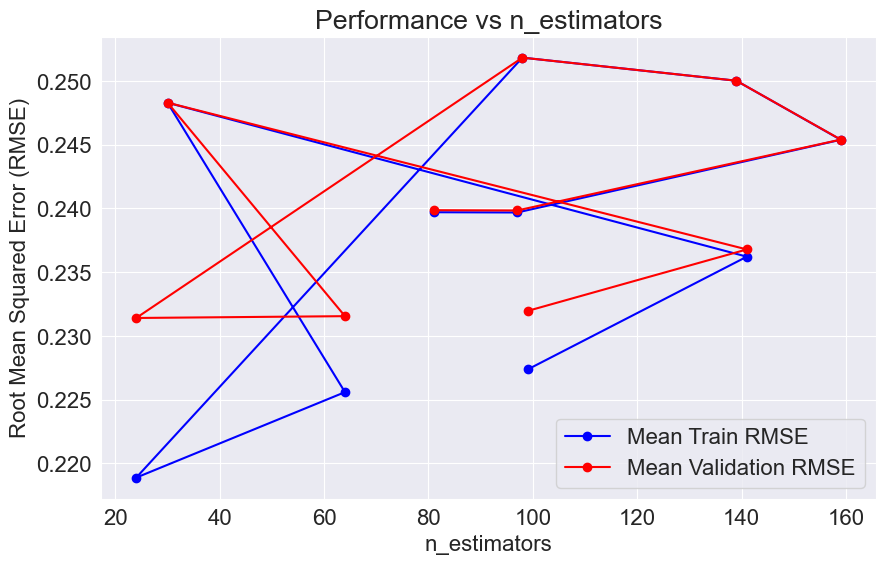

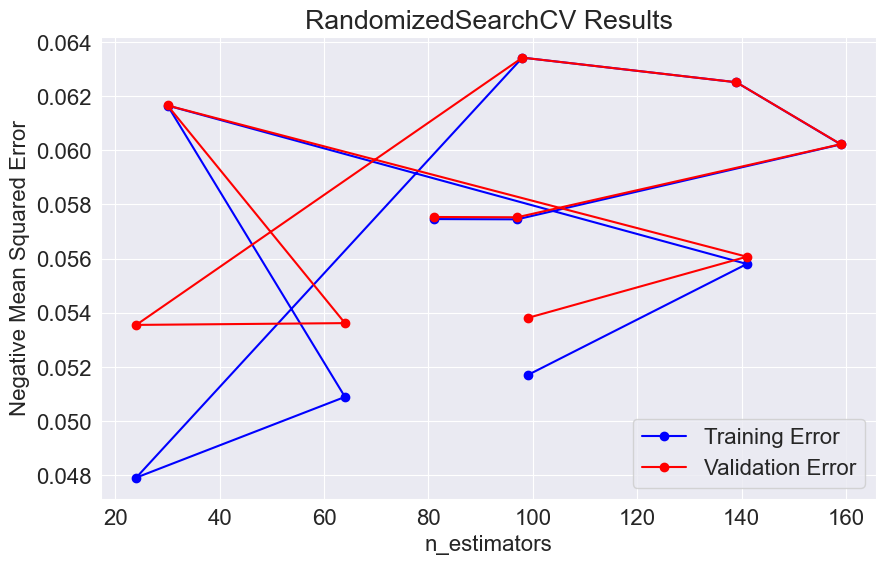

CPU times: total: 5min 8s
Wall time: 1h 8min 38s


In [49]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Assuming you have X_train, X_val, and train_targets defined before this point

# Define hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on training data and transform both training and validation data
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Initialize the model (Random Forest Regressor)
model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with return_train_score=True
rf_random = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,  # You can adjust the number of iterations
    cv=3,
    scoring='neg_mean_squared_error',  # Use negative mean squared error for regression
    random_state=42,
    n_jobs=-1,
    return_train_score=True  # Add this parameter
)

# Fit the model on the imputed training data
rf_random.fit(X_train_imputed, train_targets)

# Get the best hyperparameters
best_params = rf_random.best_params_

# Display the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Generate predictions on imputed training and validation sets using the best model
best_model = rf_random.best_estimator_
train_preds = best_model.predict(X_train_imputed)
val_preds = best_model.predict(X_val_imputed)

# Access the results of the RandomizedSearchCV
results = rf_random.cv_results_

# Plot different values of a single parameter (n_estimators in this case)
param_values = results['param_n_estimators'].data.astype(int)
mean_train_scores = np.sqrt(-results['mean_train_score'])  # Fix negation
mean_val_scores = np.sqrt(-results['mean_test_score'])  # Fix negation

plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_train_scores, 'b-o', label='Mean Train RMSE')
plt.plot(param_values, mean_val_scores, 'r-o', label='Mean Validation RMSE')
plt.title('Performance vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting hyperparameter tuning results
param_name = list(param_dist.keys())[0]  # Assuming the first parameter is the one you want to plot
param_values = results[f'param_{param_name}'].data.astype(int)

train_errors = -results['mean_train_score']
val_errors = -results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.title('RandomizedSearchCV Results')
plt.plot(param_values, train_errors, 'b-o', label='Training Error')
plt.plot(param_values, val_errors, 'r-o', label='Validation Error')
plt.xlabel(param_name)
plt.ylabel('Negative Mean Squared Error')
plt.legend()
plt.show()




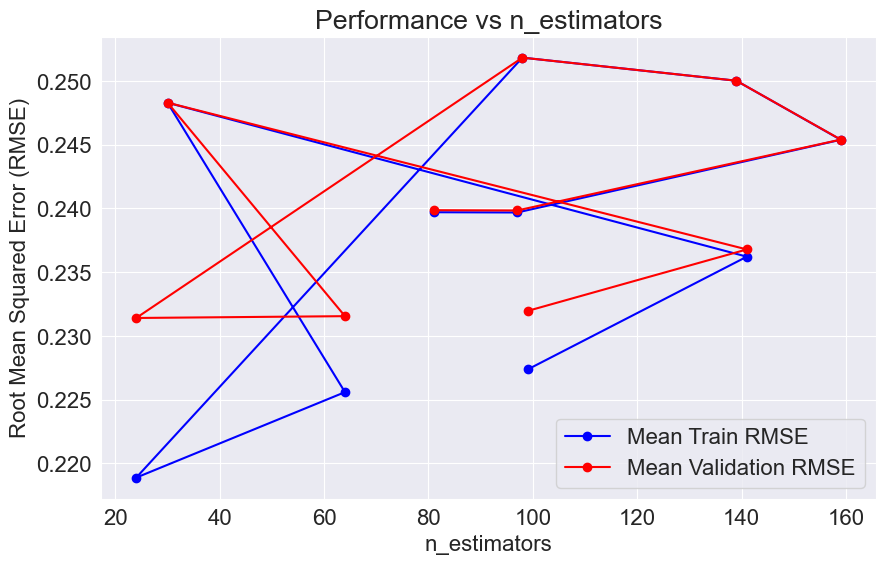

In [50]:
# Access the results of the RandomizedSearchCV
results = rf_random.cv_results_

# Plot different values of a single parameter (n_estimators in this case)
param_values = results['param_n_estimators'].data.astype(int)
mean_train_scores = np.sqrt(-results['mean_train_score'])  # Fix negation
mean_val_scores = np.sqrt(-results['mean_test_score'])  # Fix negation

plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_train_scores, 'b-o', label='Mean Train RMSE')
plt.plot(param_values, mean_val_scores, 'r-o', label='Mean Validation RMSE')
plt.title('Performance vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.grid(True)
plt.show()


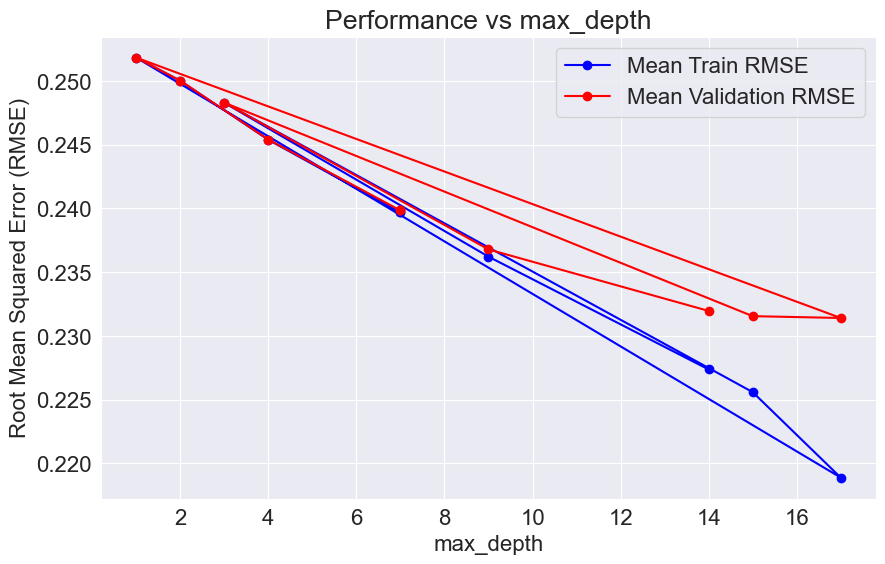

In [51]:
# Plot different values of a single parameter (max_depth in this case)
param_values = results['param_max_depth'].data.astype(int)
mean_train_scores = np.sqrt(-results['mean_train_score'])  # Fix negation
mean_val_scores = np.sqrt(-results['mean_test_score'])  # Fix negation

plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_train_scores, 'b-o', label='Mean Train RMSE')
plt.plot(param_values, mean_val_scores, 'r-o', label='Mean Validation RMSE')
plt.title('Performance vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.grid(True)
plt.show()


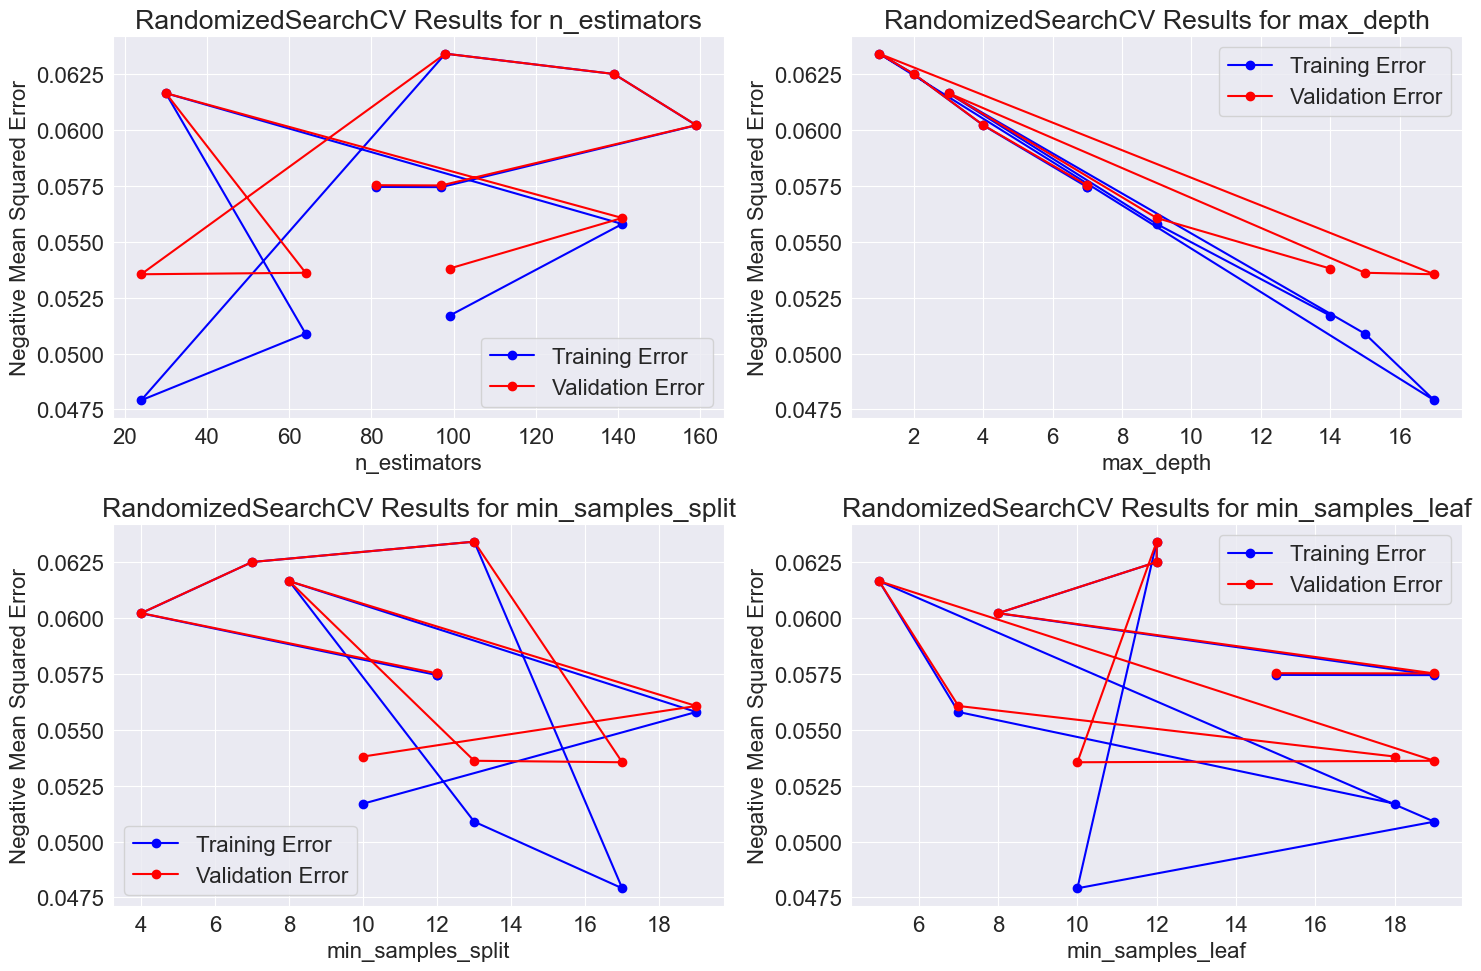

In [52]:
# Plotting hyperparameter tuning results
param_names = list(param_dist.keys())
plt.figure(figsize=(15, 10))

for param_name in param_names:
    param_values = results[f'param_{param_name}'].data.astype(int)

    train_errors = -results['mean_train_score']
    val_errors = -results['mean_test_score']

    plt.subplot(2, 2, param_names.index(param_name) + 1)
    plt.plot(param_values, train_errors, 'b-o', label='Training Error')
    plt.plot(param_values, val_errors, 'r-o', label='Validation Error')
    plt.xlabel(param_name)
    plt.ylabel('Negative Mean Squared Error')
    plt.title(f'RandomizedSearchCV Results for {param_name}')
    plt.legend()

plt.tight_layout()
plt.show()


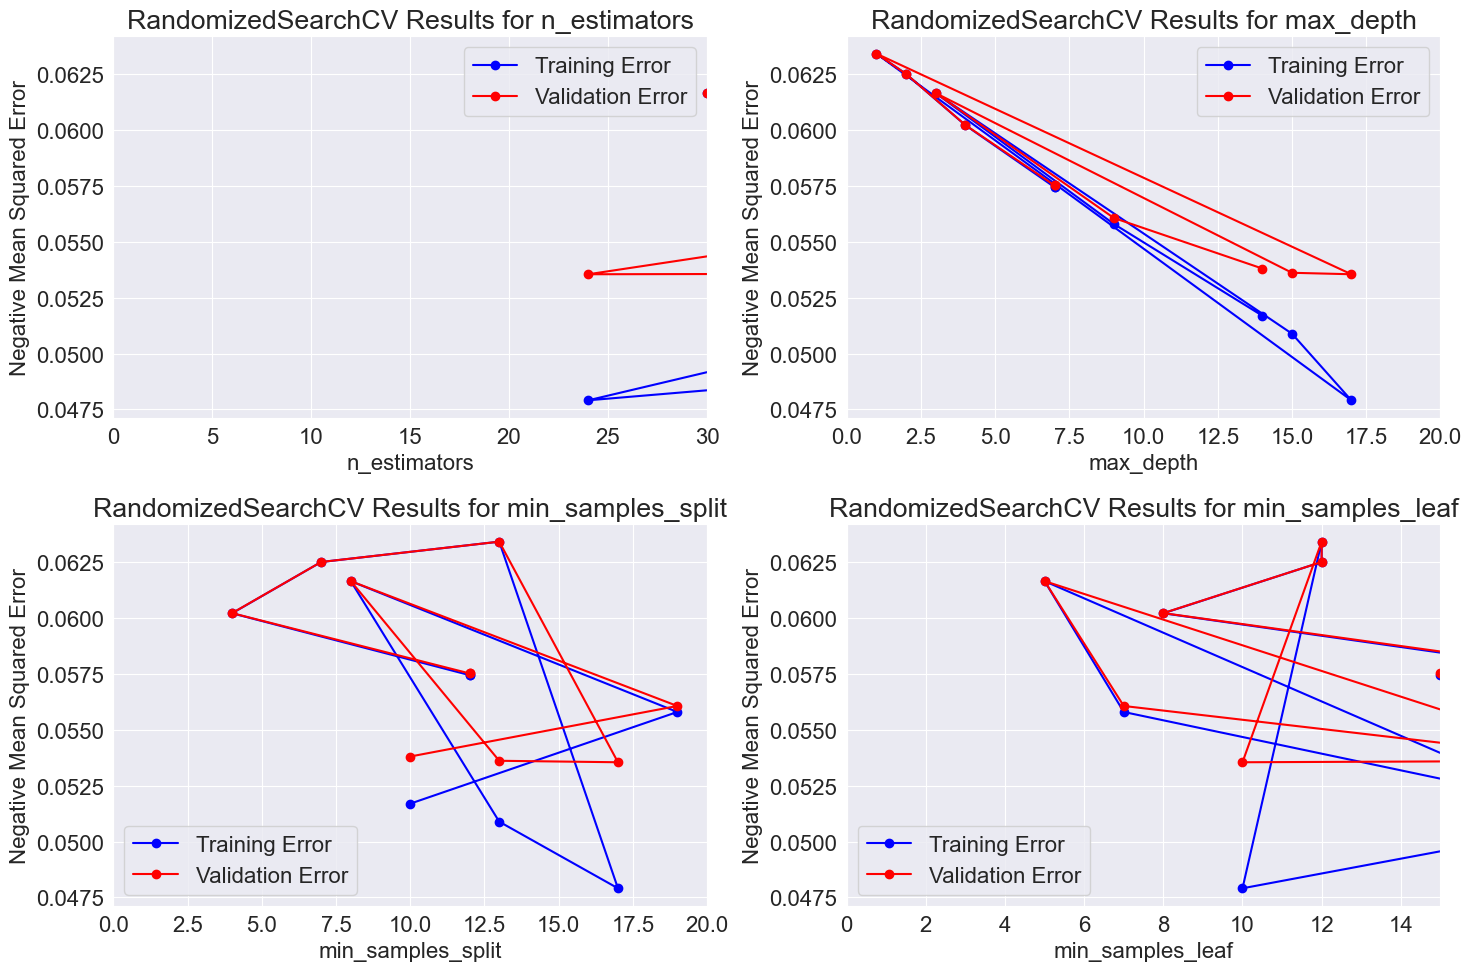

In [53]:
# Plotting hyperparameter tuning results with specified plot ranges
param_names = list(param_dist.keys())
plt.figure(figsize=(15, 10))

for param_name in param_names:
    param_values = results[f'param_{param_name}'].data.astype(int)

    train_errors = -results['mean_train_score']
    val_errors = -results['mean_test_score']

    plt.subplot(2, 2, param_names.index(param_name) + 1)
    plt.plot(param_values, train_errors, 'b-o', label='Training Error')
    plt.plot(param_values, val_errors, 'r-o', label='Validation Error')
    plt.xlabel(param_name)
    plt.ylabel('Negative Mean Squared Error')

    # Adjusting plot ranges for specific parameters
    if param_name == 'n_estimators':
        plt.xlim(0, 30)
    elif param_name == 'max_depth':
        plt.xlim(0, 20)
    elif param_name == 'min_samples_split':
        plt.xlim(0, 20)
    elif param_name == 'min_samples_leaf':
        plt.xlim(0, 15)

    plt.title(f'RandomizedSearchCV Results for {param_name}')
    plt.legend()

plt.tight_layout()
plt.show()


# Best Hypermater as an input to Random forest 

In [43]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error

# # Assume X_train and X_val have missing values

# # Impute missing values with the mean
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)

# # Define hyperparameter grid
# param_dist = {
#     'n_estimators': randint(10, 200),
#     'max_depth': randint(1, 20),
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 20),
# }

# # Initialize the model (Random Forest Regressor)
# model = RandomForestRegressor(random_state=42)

# # Initialize RandomizedSearchCV
# rf_random = RandomizedSearchCV(
#     model,
#     param_distributions=param_dist,
#     n_iter=10,
#     cv=3,
#     scoring='neg_mean_squared_error',  # Use negative mean squared error for regression
#     random_state=42,
#     n_jobs=-1,
# )

# # Fit the model on the imputed training data
# rf_random.fit(X_train_imputed, train_targets)

# # Get the best hyperparameters
# best_params = rf_random.best_params_

# # Display the best hyperparameters
# print("Best Hyperparameters:")
# print(best_params)

# # Access the results of the RandomizedSearchCV
# results = rf_random.cv_results_

# # Plot different values of a single parameter (n_estimators in this case)
# param_values = results['param_n_estimators'].data.astype(int)
# mean_train_scores = np.sqrt(-results['mean_train_score'])
# mean_val_scores = np.sqrt(-results['mean_test_score'])

# plt.figure(figsize=(10, 6))
# plt.plot(param_values, mean_train_scores, 'b-o', label='Mean Train RMSE')
# plt.plot(param_values, mean_val_scores, 'r-o', label='Mean Validation RMSE')
# plt.title('Performance vs n_estimators')
# plt.xlabel('n_estimators')
# plt.ylabel('Root Mean Squared Error (RMSE)')
# plt.legend()
# plt.grid(True)
# plt.show()


In [44]:
# #############code runs
# %%time

# import xgboost as xgb
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# # Assume X_train and X_val have missing values

# # Impute missing values with the mean
# imputer = SimpleImputer(strategy='mean')

# # Fit the imputer on training data and transform both training and validation data
# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)

# # Initialize the model (XGBoost Regressor)
# model = xgb.XGBRegressor(random_state=42)

# # Fit the model on the imputed training data
# model.fit(X_train_imputed, train_targets)

# # Generate predictions on imputed training and validation sets
# train_preds = model.predict(X_train_imputed)
# val_preds = model.predict(X_val_imputed)

# # Compute RMSE for training set
# train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

# # Compute RMSE for validation set
# val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

# # Print the results
# print('XGBoost Regressor: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


In [ ]:
# importances = model.feature_importances_

# # Display feature importances
# for feature, importance in zip(X_train.columns, importances):
#     print(f"{feature}: {importance}")

In [ ]:
# importance_df = pd.DataFrame({ 
#     'feature': numeric_cols+categorical_cols, 
#     'importance': model.feature_importances_
# }).sort_values('importance', ascending=False)
# importance_df.head(10)

In [ ]:
#sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [45]:
##########code runs
# %%time
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# # Assume X_train and X_val have missing values

# # Impute missing values with the mean
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)

# # Use the best hyperparameters obtained from RandomizedSearchCV
# best_params = {'n_estimators': 24, 'max_depth': 17, 'min_samples_split': 17, 'min_samples_leaf': 10}

# # Initialize the model (Random Forest Regressor) with best hyperparameters
# model = RandomForestRegressor(random_state=42, **best_params)

# # Fit the model on the imputed training data
# model.fit(X_train_imputed, train_targets)

# # Generate predictions on imputed training and validation sets
# train_preds = model.predict(X_train_imputed)
# val_preds = model.predict(X_val_imputed)

# # Compute RMSE for training set
# train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

# # Compute RMSE for validation set
# val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

# # Print the results
# print('Random Forest Regressor with Best Hyperparameters: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


In [46]:
# importances = model.feature_importances_

# # Display feature importances
# for feature, importance in zip(X_train.columns, importances):
#     print(f"{feature}: {importance}")

In [47]:
# importance_df = pd.DataFrame({ 
#     'feature': numeric_cols+categorical_cols, 
#     'importance': model.feature_importances_
# }).sort_values('importance', ascending=False)
# importance_df.head(10)

In [48]:
#sns.barplot(data=importance_df.head(10), x='importance', y='feature');

NameError: name 'importance_df' is not defined

In [ ]:
# %%time
# from math import sqrt
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from scipy.stats import randint
# from sklearn.metrics import mean_squared_error

# def hyperparameter_tuning_optimized(X_train_imputed, train_targets):
#     # Split the data into training and validation sets
#     X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
#         X_train_imputed, train_targets, test_size=0.2, random_state=42
#     )

#     # Initialize the model (Random Forest Regressor)
#     rf = RandomForestRegressor(random_state=42)

#     # Define hyperparameter grid with reduced ranges
#     param_dist = {
#         'n_estimators': randint(10, 50),  # Reduced range
#         'max_features': ['auto', 'sqrt', 'log2', None],
#         'max_depth': randint(1, 10),  # Reduced range
#         'min_samples_split': randint(2, 20),  # Reduced range
#         'min_samples_leaf': randint(1, 20),  # Reduced range
#     }

#     # Reduce the number of iterations
#     n_iter = 20

#     # Parallelize the search
#     n_jobs = -1

#     # Initialize RandomizedSearchCV
#     rf_random = RandomizedSearchCV(
#         rf,
#         param_distributions=param_dist,
#         n_iter=n_iter,
#         cv=3,
#         scoring='neg_mean_squared_error',
#         random_state=42,
#         n_jobs=n_jobs,
#     )

#     # Fit the model on the imputed training data
#     rf_random.fit(X_train_split, y_train_split)

#     # Get the best hyperparameters
#     best_params = rf_random.best_params_

#     # Predict on the training and validation sets
#     train_preds = rf_random.predict(X_train_split)
#     val_preds = rf_random.predict(X_val_split)

#     # Calculate RMSE on the training and validation sets
#     train_rmse = sqrt(mean_squared_error(y_train_split, train_preds))
#     val_rmse = sqrt(mean_squared_error(y_val_split, val_preds))

#     print("Best Hyperparameters:")
#     print(best_params)

#     print("Training RMSE:", train_rmse)
#     print("Validation RMSE:", val_rmse)

#     # Plotting hyperparameter tuning results
#     param_name = list(param_dist.keys())[np.argmax([len(v) for v in param_dist.values()])]
#     param_values = np.arange(10, 50, 5)  # Adjust range and step as needed

#     train_errors = -rf_random.cv_results_['mean_train_score']
#     val_errors = -rf_random.cv_results_['mean_test_score']

#     # Plot every 5th value for better performance
#     plt.figure(figsize=(10, 6))
#     plt.title('RandomizedSearchCV Results')
#     for i in range(0, len(param_values), 5):
#         plt.plot(param_values[i], train_errors[i], 'b-o', label='Training Error')
#         plt.plot(param_values[i], val_errors[i], 'r-o', label='Validation Error')
#     plt.xlabel(param_name)
#     plt.ylabel('Negative Mean Squared Error')
#     plt.legend()
#     plt.show()


In [ ]:
# %%time
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import cross_val_score

# def test_and_plot_param(X_train, train_targets, param_name, param_values, n_jobs=1):
#     """
#     Test and plot the performance of a Random Forest Regressor with different values for a single parameter.

#     Parameters:
#     - X_train: Features of the training set
#     - train_targets: Target values of the training set
#     - param_name: Name of the parameter to be tested
#     - param_values: List of values for the parameter
#     - n_jobs: Number of CPU cores to use

#     Returns:
#     - None (plots the results)
#     """
#     # Impute missing values with the mean
#     imputer = SimpleImputer(strategy='mean')
#     X_train_imputed = imputer.fit_transform(X_train)

#     # Initialize an empty list to store mean squared errors
#     mse_scores = []

#     # Test different values for the parameter
#     for value in param_values:
#         # Create a Random Forest Regressor with the current parameter value
#         rf = RandomForestRegressor(random_state=42, **{param_name: value})

#         # Calculate cross-validated mean squared error
#         mse = -np.mean(cross_val_score(rf, X_train_imputed, train_targets, scoring='neg_mean_squared_error', cv=2, n_jobs=n_jobs))

#         # Append the mean squared error to the list
#         mse_scores.append(mse)

#     # Plot the results
#     plt.figure(figsize=(10, 6))
#     plt.plot(param_values, mse_scores, marker='o')
#     plt.title(f'Performance vs {param_name}')
#     plt.xlabel(param_name)
#     plt.ylabel('Mean Squared Error (CV)')
#     plt.grid(True)
#     plt.show()

# # Example usage:
# # Define values to test for n_estimators
# n_estimators_values = [10, 50, 100]

# # Test and plot the performance for n_estimators
# test_and_plot_param(X_train, train_targets, 'n_estimators', n_estimators_values, n_jobs=4)



In [ ]:
# %%time
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error

# # Impute missing values with the mean
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)

# # Initialize the final model with optimized hyperparameters
# best_rf_model = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42, n_jobs=-1, max_features='sqrt')

# # Train the final model on the entire training set
# best_rf_model.fit(X_train_imputed, train_targets)

# # Make predictions on the validation set
# val_preds = best_rf_model.predict(X_val_imputed)

# # Calculate and print the RMSE on the validation set
# val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
# print(f'Validation RMSE for the best model: {val_rmse}')

# # Get feature importances
# feature_importances = best_rf_model.feature_importances_

# # Create a bar chart to visualize feature importances
# sorted_idx = np.argsort(feature_importances)[::-1]
# features = X_train.columns[sorted_idx]
# importances = feature_importances[sorted_idx]

# plt.figure(figsize=(12, 6))
# plt.bar(features, importances)
# plt.title('Feature Importances of the Best Model')
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.xticks(rotation=45, ha="right")
# plt.show()


In [ ]:
#!pip install xgboost


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt

# # Assume X_train, X_val, train_targets, val_targets are available

# # Impute missing values with the mean
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)

# # Initialize the model (XGBoost Regressor)
# model = XGBRegressor(random_state=42)

# # Define a smaller hyperparameter grid for tuning
# param_dist = {
#   'n_estimators': [50],
#   'learning_rate': [0.01],
#   'max_depth': [3],
#   'min_child_weight': [1],
#   'subsample': [0.8],
#   'colsample_bytree': [0.8]
# }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#   model,
#   param_distributions=param_dist,
#   n_iter=5, # Adjust as needed
#   cv=2,
#   scoring='neg_mean_squared_error',
#   n_jobs=-1,
#   verbose=2
# )

# # Fit the model on the imputed training data
# random_search.fit(X_train_imputed, train_targets)

# # Get the best hyperparameters
# best_params = random_search.best_params_

# # Display the best hyperparameters
# print("Best Hyperparameters:")
# print(best_params)

# # Generate predictions on imputed training and validation sets using the best model
# best_model = random_search.best_estimator_
# train_preds = best_model.predict(X_train_imputed)
# val_preds = best_model.predict(X_val_imputed)

# # Compute RMSE for training set
# train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

# # Compute RMSE for validation set
# val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

# # Print the results
# print('XGBoost Regressor: \n Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


In [ ]:
# import xgboost as xgb
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error

# def calculate_rmse_xgboost(model, X_train, X_val, y_train, y_val):
#     """
#     Helper function to calculate RMSE for XGBoost model.

#     Parameters:
#     - model: XGBoost model
#     - X_train, X_val: Training and validation feature sets
#     - y_train, y_val: Training and validation target sets

#     Returns:
#     - train_rmse, val_rmse: Train and validation RMSE values
#     """

#     model.fit(X_train, y_train)

#     # Generate predictions
#     train_preds = model.predict(X_train)
#     val_preds = model.predict(X_val)

#     # Compute RMSE
#     train_rmse = mean_squared_error(y_train, train_preds, squared=False)
#     val_rmse = mean_squared_error(y_val, val_preds, squared=False)

#     return train_rmse, val_rmse

# def plot_feature_importance_xgboost(model, feature_names):
#     """
#     Helper function to plot feature importances for XGBoost model.

#     Parameters:
#     - model: XGBoost model
#     - feature_names: List of feature names
#     """

#     xgb.plot_importance(model, importance_type='weight', xlabel='Weight', ylabel='Features', title='Feature Importance')
#     plt.show()

# # Example usage:

# # Initialize the XGBoost model
# xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# # Calculate and print the RMSE on the training and validation sets
# train_rmse, val_rmse = calculate_rmse_xgboost(xgb_model, X_train, X_val, train_targets, val_targets)
# print(f'Train RMSE for XGBoost: {train_rmse}')
# print(f'Validation RMSE for XGBoost: {val_rmse}')

# # Plot feature importances
# plot_feature_importance_xgboost(xgb_model, X_train.columns)
